In [1]:
%matplotlib inline

import sys
import statsmodels as ss
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
versions = ( ("matplotlib", matplotlib.__version__),
            ("numpy", np.__version__),
            ("pandas", pd.__version__),
            ("statsmodels", ss.__version__) )

print(sys.version, "\n")
print("library" + " " * 4 + "version")
print("-" * 18)

for tup1, tup2 in versions:
    print("{:11} {}".format(tup1, tup2))

3.9.13 (main, Aug 25 2022, 18:29:29) 
[Clang 12.0.0 ] 

library    version
------------------
matplotlib  3.5.2
numpy       1.21.5
pandas      1.4.4
statsmodels 0.13.2


---

In [3]:
# reproducibility
np.random.seed(42)

# data
time = np.arange(100)
stationary = np.random.normal(loc=0, scale=1.0, size=len(time))
stationary

array([ 0.49671415, -0.1382643 ,  0.64768854,  1.52302986, -0.23415337,
       -0.23413696,  1.57921282,  0.76743473, -0.46947439,  0.54256004,
       -0.46341769, -0.46572975,  0.24196227, -1.91328024, -1.72491783,
       -0.56228753, -1.01283112,  0.31424733, -0.90802408, -1.4123037 ,
        1.46564877, -0.2257763 ,  0.0675282 , -1.42474819, -0.54438272,
        0.11092259, -1.15099358,  0.37569802, -0.60063869, -0.29169375,
       -0.60170661,  1.85227818, -0.01349722, -1.05771093,  0.82254491,
       -1.22084365,  0.2088636 , -1.95967012, -1.32818605,  0.19686124,
        0.73846658,  0.17136828, -0.11564828, -0.3011037 , -1.47852199,
       -0.71984421, -0.46063877,  1.05712223,  0.34361829, -1.76304016,
        0.32408397, -0.38508228, -0.676922  ,  0.61167629,  1.03099952,
        0.93128012, -0.83921752, -0.30921238,  0.33126343,  0.97554513,
       -0.47917424, -0.18565898, -1.10633497, -1.19620662,  0.81252582,
        1.35624003, -0.07201012,  1.0035329 ,  0.36163603, -0.64

In [4]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

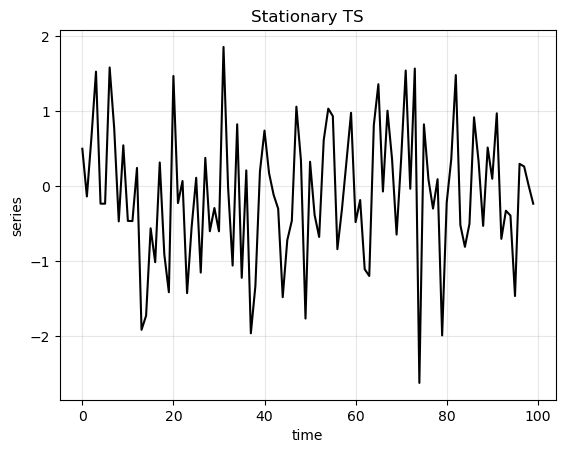

In [5]:
run_sequence_plot(time, stationary, 
                  title="Stationary TS")

In [6]:
# seed to start series
seed = 3.14

# create autocorrelated data
lagged = np.empty_like(time, dtype='float')
for t in time:
    lagged[t] = seed + np.random.normal(loc=0, scale=2.5, size=1)
    seed = lagged[t]
lagged

array([-0.39842686, -1.45004016, -2.30682645, -4.31251963, -4.71573391,
       -3.70560676,  1.00985799,  1.44630252,  2.0901785 ,  1.90406371,
       -2.89286433, -2.95914902, -2.80857349,  3.34953179,  2.86862938,
        3.62249773,  3.53571831,  0.61402321,  3.47108025,  5.35091283,
        7.3284927 ,  5.05502406,  8.56200984,  5.05738218,  6.52452492,
       12.00066398,  9.52432317,  8.10857884,  8.35770726,  7.09901812,
        3.22235954,  3.39376698,  0.7380077 ,  1.92198877, -0.37657181,
        3.4982642 ,  1.54013097,  0.73497718,  2.76877022, -0.30839057,
        0.26025927,  3.52811615, -0.49059193, -0.02900729,  0.6206997 ,
        2.57525688, -0.5171199 , -3.81826143, -2.51340752, -1.77094583,
       -1.14471371, -0.27859318, -1.97865499, -1.39802075, -0.66533956,
       -2.45121811,  2.21321817,  3.39780047,  0.41954173,  2.06092575,
       -0.37577842,  1.59193309,  4.48842203,  2.43671624,  4.84515656,
        5.87710888,  7.93225928, 12.67424173, 12.06077144, 10.17

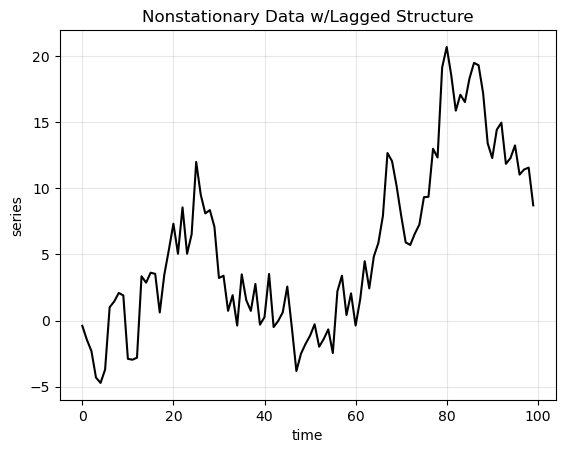

In [7]:
run_sequence_plot(time, lagged,
                  title="Nonstationary Data w/Lagged Structure")

In [8]:
trend = (time * 2.75) + stationary

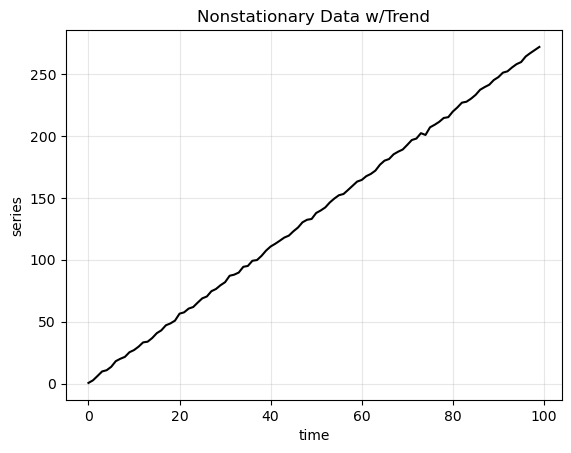

In [9]:
run_sequence_plot(time, trend,
                  title="Nonstationary Data w/Trend")

In [10]:
# reproducibility
np.random.seed(1234)

# data
level_1 = np.random.normal(loc=0, scale=1.0, size = 50)
level_2 = np.random.normal(loc=0, scale=10.0, size = 50)
heteroscedasticity = np.append(level_1, level_2)

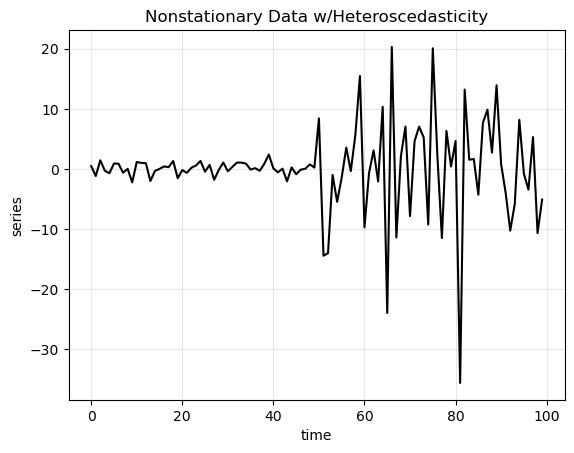

In [11]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

In [12]:
seasonality = 10 + np.sin(time) * 10

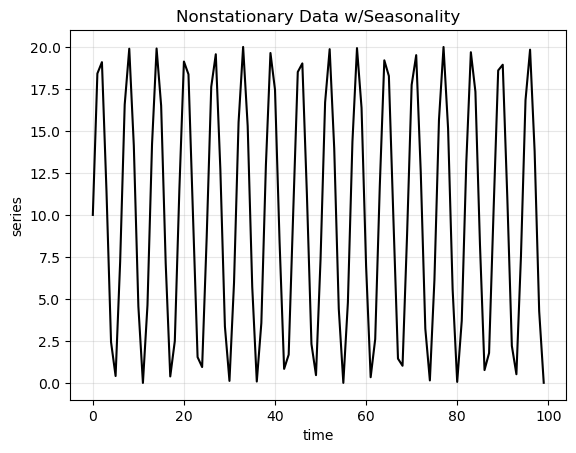

In [13]:
run_sequence_plot(time, seasonality,
                  title="Nonstationary Data w/Seasonality")

#### Trend + Seasonality

In [14]:
trend_seasonality = trend + seasonality + stationary

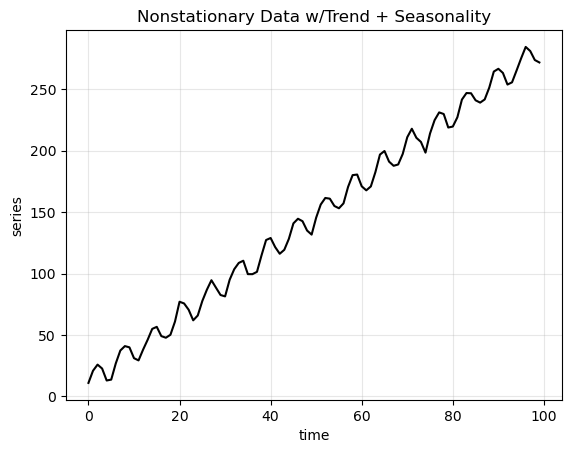

In [15]:
run_sequence_plot(time, trend_seasonality,
                  title="Nonstationary Data w/Trend + Seasonality")

In [16]:
# create time variable
np.random.seed(42)

# data
mytime = np.arange(100)
mytime

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [17]:
# get data
path_to_file = "../Data/"
dataset_SNS_1 = np.load(path_to_file + "dataset_SNS_1.npy")
dataset_SNS_2 = np.load(path_to_file + "dataset_SNS_2.npy")

In [18]:
def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3);

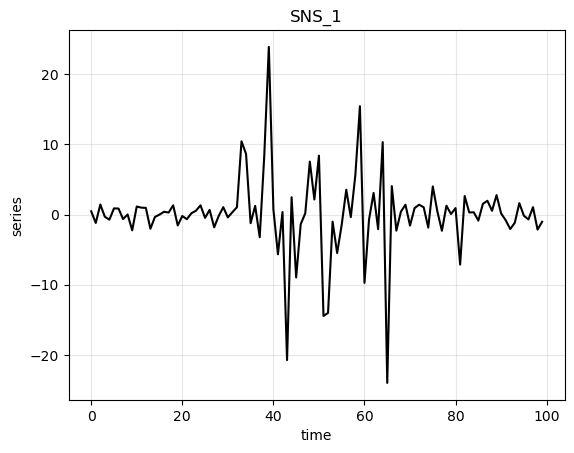

In [19]:
# plot dataset_SNS_1
run_sequence_plot(time, dataset_SNS_1, 
                  title="SNS_1")

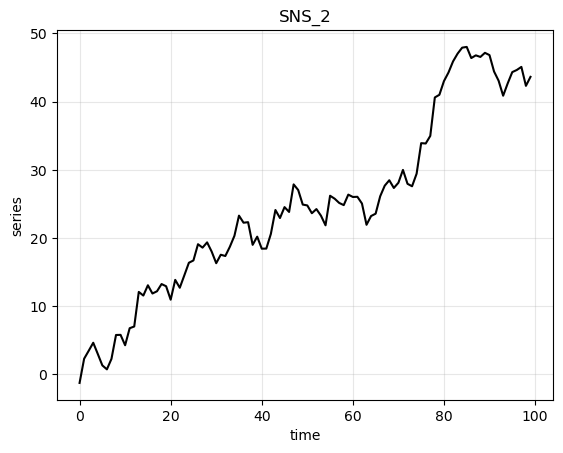

In [20]:
# plot dataset_SNS_2
run_sequence_plot(time, dataset_SNS_2, 
                  title="SNS_2")

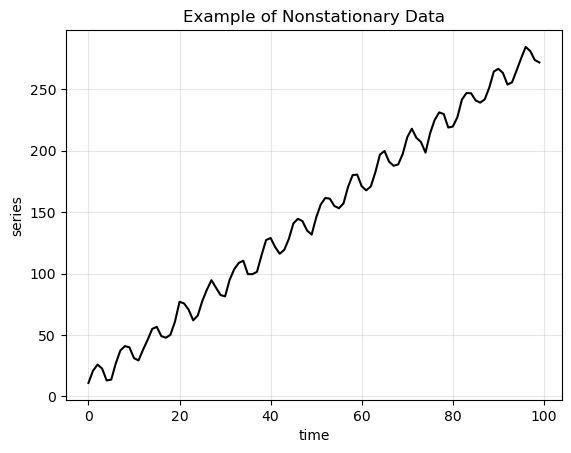

In [21]:
run_sequence_plot(time, trend_seasonality,
                  title="Example of Nonstationary Data")

In [22]:
# split data into 10 chunks
chunks = np.split(trend, indices_or_sections=10)

In [23]:
# compare means and variances
print("{} | {:7} | {}".format("Chunk", "Mean", "Variance"))
print("-" * 26)
for i, chunk in enumerate(chunks, 1):
    print("{:5} | {:.6} | {:.6}".format(i, np.mean(chunk), np.var(chunk)))

Chunk | Mean    | Variance
--------------------------
    1 | 12.8231 | 62.548
    2 | 39.0843 | 60.8662
    3 | 67.1532 | 58.7456
    4 | 94.5649 | 57.2321
    5 | 122.122 | 58.9505
    6 | 150.074 | 65.1111
    7 | 177.36 | 67.7091
    8 | 204.827 | 54.8101
    9 | 232.476 | 62.6766
   10 | 259.726 | 61.6424


In [24]:
np.mean(chunks, axis=1)

array([ 12.82306111,  39.08434177,  67.15315644,  94.56489333,
       122.12217783, 150.07444143, 177.35994301, 204.82726388,
       232.47644743, 259.72580861])

In [25]:
np.var(chunks, axis=1)

array([62.54798758, 60.86616531, 58.74556884, 57.2320973 , 58.9505395 ,
       65.11109596, 67.70905522, 54.81013753, 62.67659981, 61.642402  ])

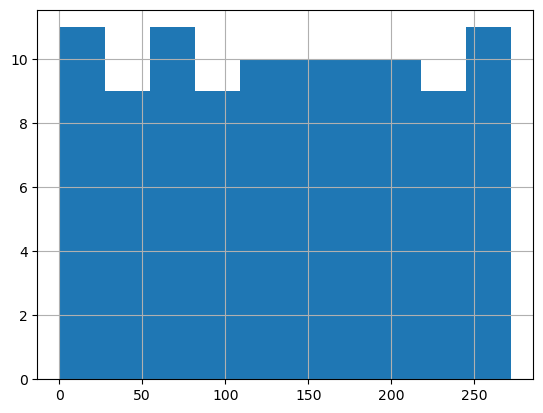

In [26]:
pd.Series(trend).hist();

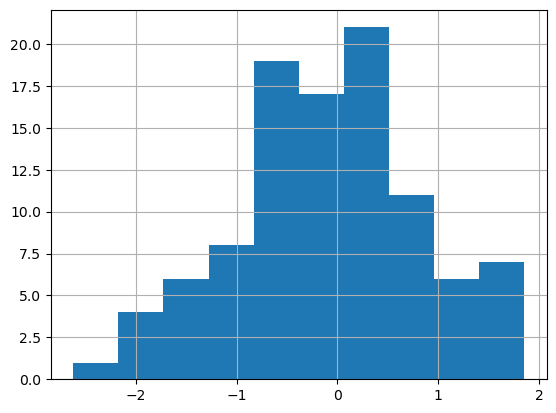

In [27]:
pd.Series(stationary).hist();

In [32]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [33]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(trend, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  0.33188731231642266
p-value: 0.9787610787258308


In [34]:
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(lagged, regression='c')
print("ADF: ", adf)
print("p-value:", pvalue)

ADF:  -1.8975904890519306
p-value: 0.3331954683868471


In [35]:
# run-sequence plots


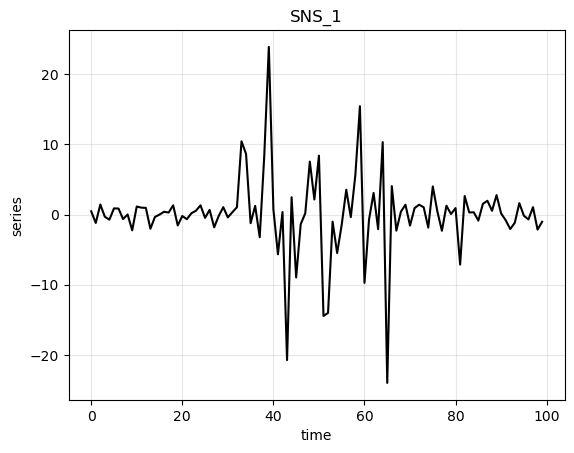

In [36]:
# plot dataset_SNS_1
run_sequence_plot(time, dataset_SNS_1, 
                  title="SNS_1")

In [38]:
# split data into 10 chunks
chunks = np.split(dataset_SNS_1, indices_or_sections=10)

In [39]:
np.mean(chunks, axis=1)

array([-0.14368349,  0.121089  ,  0.04714784,  4.92083495, -2.32626967,
       -0.3706503 , -1.95084875,  0.34634898,  0.30483126, -0.51907842])

In [40]:
np.var(chunks, axis=1)

array([ 1.1064868 ,  1.16521661,  0.76635153, 59.91993023, 55.94682032,
       79.168351  , 77.81561226,  3.18839451,  7.29302955,  1.34694601])

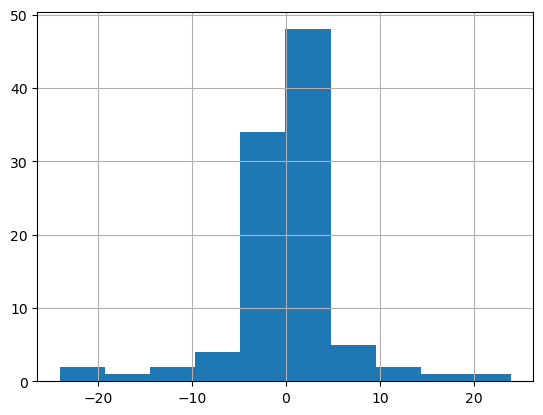

In [42]:
pd.Series(dataset_SNS_1).hist();

In [44]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(dataset_SNS_1)

In [45]:
print(adf)

-3.032415903501608


In [46]:
print(pvalue)

0.03197606455861542


In [47]:
print(critical_values)

{'1%': -3.50434289821397, '5%': -2.8938659630479413, '10%': -2.5840147047458037}


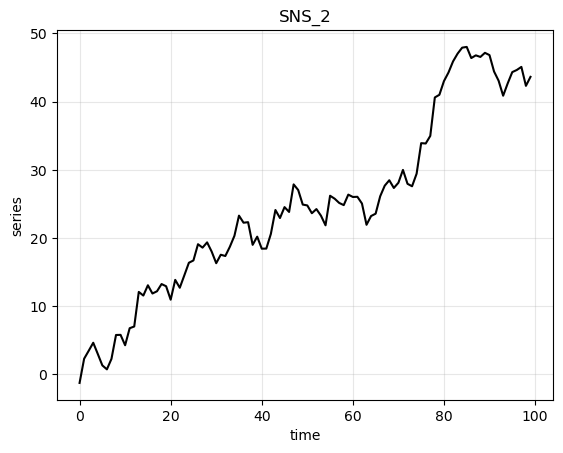

In [49]:
# plot dataset_SNS_1
run_sequence_plot(time, dataset_SNS_2, 
                  title="SNS_2")

In [51]:
# split data into 10 chunks
chunks = np.split(dataset_SNS_2, indices_or_sections=10)

In [52]:
np.mean(chunks, axis=1)

array([ 2.8186155 , 10.51083038, 16.02252814, 19.73251898, 23.26775272,
       24.60790371, 25.54323527, 32.73577811, 46.28942898, 43.77348672])

In [53]:
np.var(chunks, axis=1)

array([ 4.50258195,  9.30343813,  7.51911006,  4.97894604,  9.42707844,
        1.77171835,  3.96080036, 22.71299455,  2.22467478,  2.47819651])

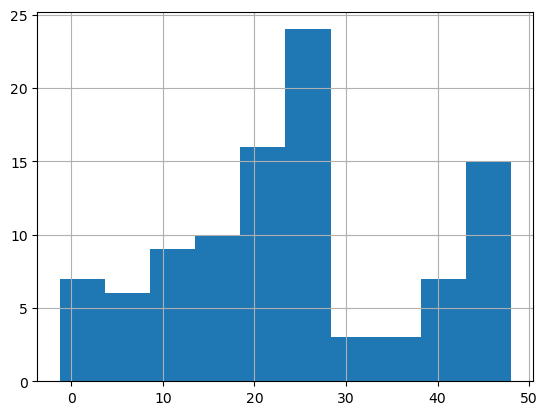

In [55]:
pd.Series(dataset_SNS_2).hist();

In [57]:
from statsmodels.tsa.stattools import adfuller

adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(dataset_SNS_2)

In [58]:
print(adf)

-1.3222642986946491


In [59]:
print(pvalue)

0.6189258221979337


In [60]:
print(critical_values)

{'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [61]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(trend_seasonality)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("critical values: ", critical_values)

ADF:  0.2940360592889458
p-value:  0.9770692037868648
critical values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=trend_seasonality, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

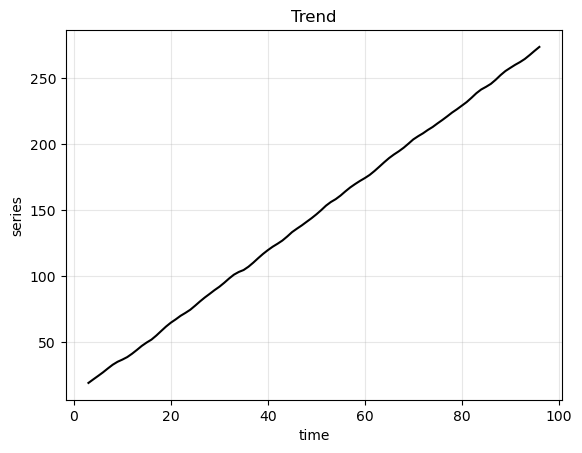

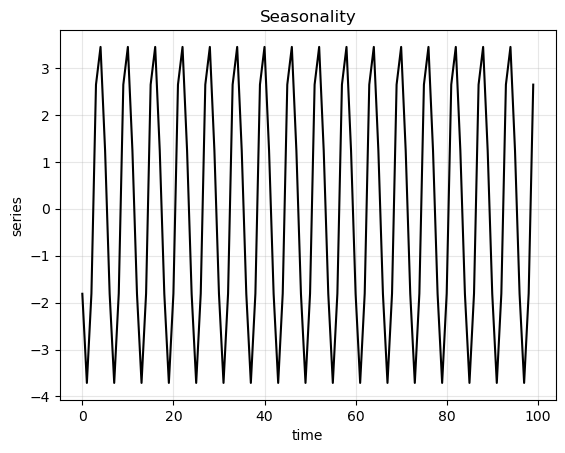

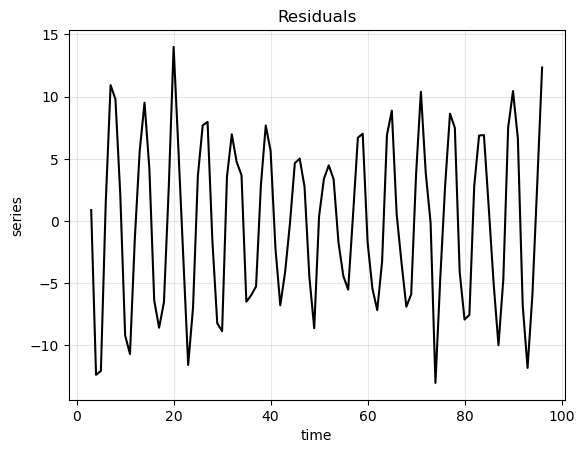

In [63]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

In [64]:
print(est_residual)

[         nan          nan          nan   0.8840983  -12.35758556
 -12.04433461   1.48296718  10.92168902   9.79838903   2.1098592
  -9.18549316 -10.68530084  -1.39341901   5.62708429   9.51728139
   4.19733863  -6.37688101  -8.57079082  -6.54120712   2.73466783
  13.99559009   5.66172011  -2.96051089 -11.56383319  -6.98680664
   3.63407228   7.6896628    7.96829354  -1.62794659  -8.22074175
  -8.84730447   3.55066635   6.97315154   4.74605812   3.69790485
  -6.48278186  -5.95820585  -5.25809215   2.87435058   7.68322103
   5.64810713  -2.17356117  -6.77398565  -4.08149483  -0.16197687
   4.65431128   5.02346523   2.76727458  -4.5018214   -8.61021749
   0.383526     3.39920212   4.47636135   3.35785156  -1.70991311
  -4.41005501  -5.51047744   0.45522075   6.69811425   7.02150652
  -1.65724247  -5.43116384  -7.15141958  -3.23759496   6.91315694
   8.8780479    0.56710431  -3.33147621  -6.88311175  -5.88888625
   3.72543884  10.38963663   3.8706296   -0.1327287  -13.00749744
  -4.573024

In [65]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
print("critical values: ", critical_values)

ADF:  -5.672045394689457
p-value:  8.87626598111449e-07
critical values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


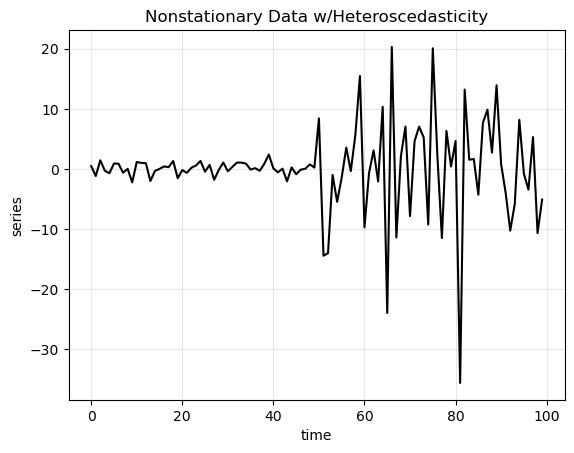

In [66]:
run_sequence_plot(time, heteroscedasticity,
                  title="Nonstationary Data w/Heteroscedasticity")

In [67]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(heteroscedasticity)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("Critical Values: ", critical_values_)

ADF:  -5.462617806964474
p-value:  2.499014740254581e-06
Critical Values:  {'1%': -3.5019123847798657, '5%': -2.892815255482889, '10%': -2.583453861475781}


In [68]:
new_hetero = heteroscedasticity + 38

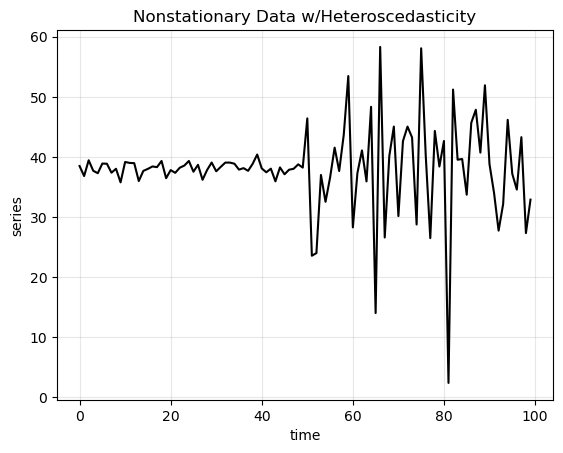

In [69]:
run_sequence_plot(time, new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

In [70]:
log_new_hetero = np.log(new_hetero)

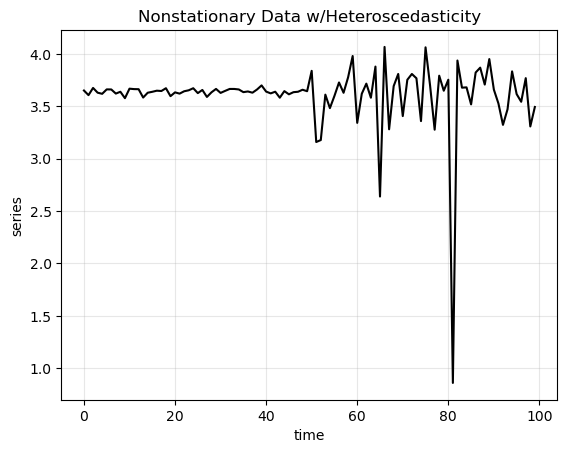

In [71]:
run_sequence_plot(time, log_new_hetero,
                  title="Nonstationary Data w/Heteroscedasticity")

In [72]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(log_new_hetero)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
print("crtical vlues: ", critical_values)

ADF:  -11.988221715202043
p-value:  3.5714555887959506e-22
crtical vlues:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [73]:
difference = lagged[:-1] - lagged[1:]

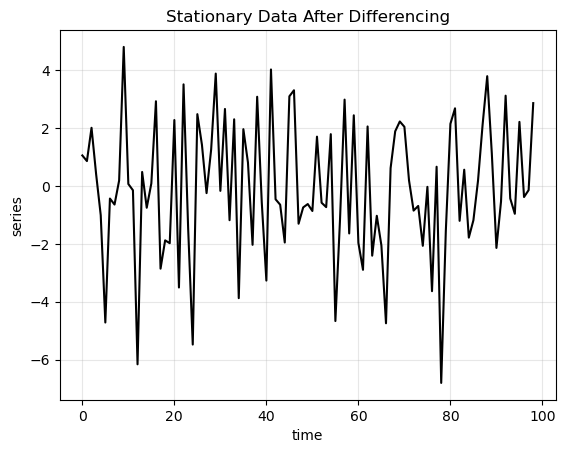

In [74]:
run_sequence_plot(time[:-1], difference,
                  title="Stationary Data After Differencing")

In [75]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(difference)
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
print("critical values: ", critical_values)

ADF:  -10.809982939729167
p-value:  1.9196947925176694e-19
critical values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [76]:
adf_b4, pvalue_b4, usedlag_, nobs_, critical_values_, icbest_ = adfuller(dataset_SNS_2)
print("ADF: ", adf_b4)
print("p-value: ", pvalue_b4)
print("critical values: ", critical_values)

ADF:  -1.3222642986946491
p-value:  0.6189258221979337
critical values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}


In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

ss_decomposition = seasonal_decompose(x=dataset_SNS_2, model='additive', period=6)
est_trend = ss_decomposition.trend
est_seasonal = ss_decomposition.seasonal
est_residual = ss_decomposition.resid

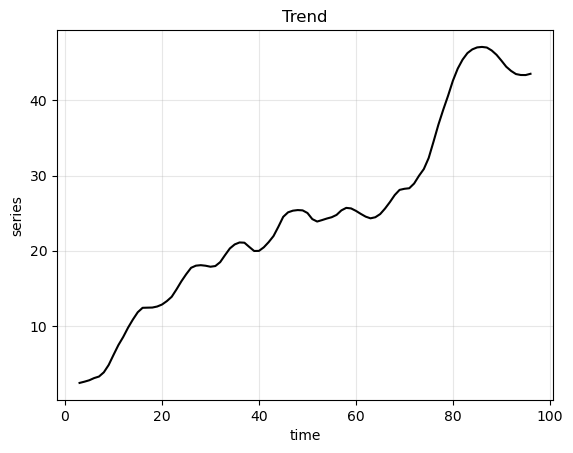

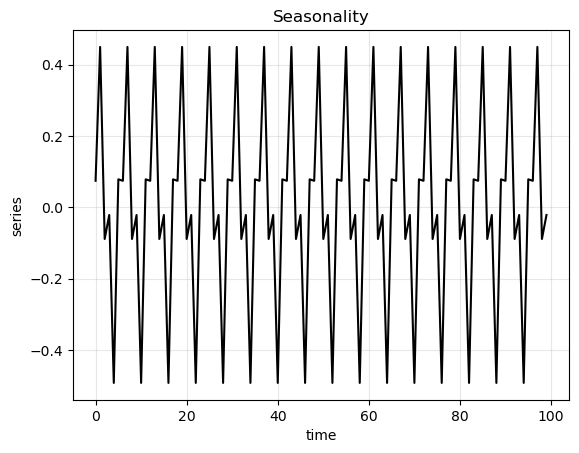

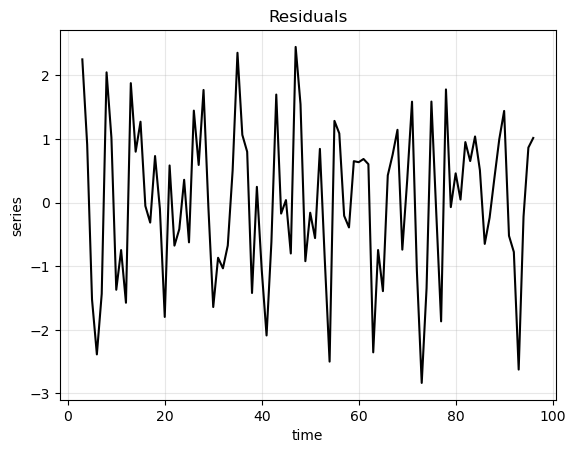

In [78]:
run_sequence_plot(time, est_trend, title="Trend", ylabel="series")
plt.show()
run_sequence_plot(time, est_seasonal, title="Seasonality", ylabel="series")
plt.show()
run_sequence_plot(time, est_residual, title="Residuals", ylabel="series")

In [79]:
print(est_residual)

[        nan         nan         nan  2.25164332  0.91311651 -1.5222694
 -2.3861046  -1.43438458  2.04765693  1.02213979 -1.36989103 -0.74622427
 -1.57415546  1.87792254  0.8004592   1.27164413 -0.05283683 -0.31420964
  0.7321111  -0.09920165 -1.79714322  0.58406459 -0.67627894 -0.41738726
  0.3586735  -0.62448903  1.44611184  0.59194224  1.77082168 -0.07267433
 -1.64137035 -0.86710074 -1.03296816 -0.67411847  0.50378415  2.35538619
  1.06488261  0.79967166 -1.4207001   0.2479742  -1.05510569 -2.08826227
 -0.61832126  1.69836598 -0.17246994  0.03988933 -0.79967962  2.44734969
  1.54748355 -0.92071178 -0.15927568 -0.55751889  0.84458616 -0.88716597
 -2.49946731  1.28485174  1.08726871 -0.20703547 -0.39028846  0.65156252
  0.63522219  0.68562812  0.60399827 -2.3539276  -0.74505928 -1.39172098
  0.42817036  0.75334466  1.14428859 -0.73939069  0.34680138  1.58671918
 -1.07113773 -2.83438054 -1.34636137  1.58845154 -0.16128733 -1.86664715
  1.77905834 -0.07086648  0.45967517  0.04808054  0.

In [80]:
adf_after, pvalue_after, usedlag_, nobs_, critical_values_, icbest_ = adfuller(est_residual[3:-3])
print("ADF: ", adf_after)
print("p-value: ", pvalue_after)
print("critical values: ", critical_values)

ADF:  -6.238390718569905
p-value:  4.763184090747618e-08
critical values:  {'1%': -3.498198082189098, '5%': -2.891208211860468, '10%': -2.5825959973472097}
